In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1/ Read the data for the training set

In [2]:
# read data files
df_train = pd.read_csv('data/train.csv')
df_meta = pd.read_csv('data/building_metadata.csv')
df_wh_tr = pd.read_csv('data/weather_train.csv')

# merge datasets
df_tr = df_train.merge(df_meta, on='building_id').sort_values(['building_id', 'meter', 'timestamp'])
df_tr = df_tr.merge(df_wh_tr, on=['site_id', 'timestamp'])
df_tr['timestamp'] = pd.to_datetime(df_tr.pop('timestamp'))
df_tr['logMeterR'] = 
df_tr.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,timestamp
0,0,0,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01
1,1,0,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01
2,2,0,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01
3,3,0,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01
4,4,0,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01


## 2/ perform a simple explorational analysis

In [3]:
target = 'meter_reading'

In [4]:
df_tr.groupby('meter').size()

meter
0    12017408
1     4160093
2     2686678
3     1261426
dtype: int64

Evolution of meter reading with other continious variables

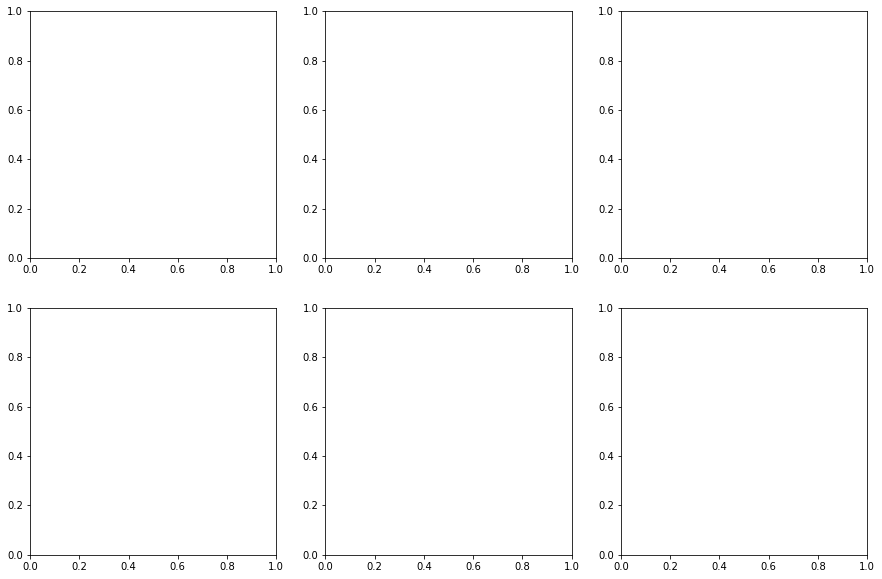

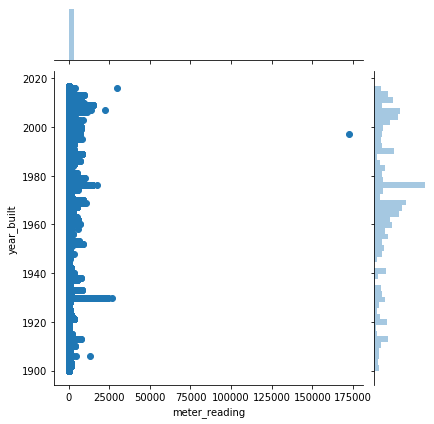

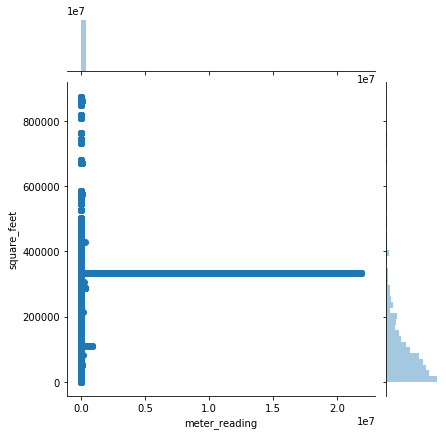

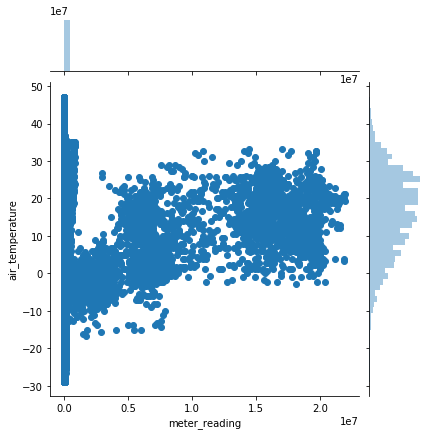

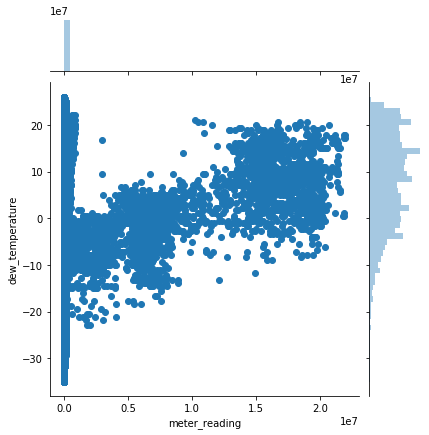

In [ ]:
continuous_vars = ['year_built', 'square_feet', 'air_temperature', 'dew_temperature', 'wind_speed']
nb = len(continuous_vars)
cols = 3
rows = int(nb / cols) + 1
fig, ax = plt.subplots(rows, cols, figsize=(15, 10))
for name, subplot in zip(continuous_vars, ax.flatten()):
    sns.jointplot(x=name, y='meter_reading', data=df_tr)

Evolution of meter reading with categorial

In [ ]:
cat_variables = ['meter', 'primary_use']
nb = len(cat_variables)
cols = 3
rows = int(nb / cols) + 1
fig, ax = plt.subplots(rows, cols, figsize=(15, 10))
for name, subplot in zip(cat_variables, ax.flatten()):
    sns.boxplot(x=name, y='meter_reading', data=df_tr)